# CWRU 轴承故障诊断数据集
## 振动信号
## 正常工况、内圈故障、外圈故障、滚动体故障
- 训练集 测试集：400x4 8:2
- 样本大小：1x1024x1

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = np.loadtxt("./fault_data/CSWU_4Class.txt")
print(data.shape)

(1600, 1024)


In [10]:
# create training set and testing set
train_data = np.vstack((data[0: 320, :], data[400: 720, :], data[800: 1120, :], data[1200: 1520, :]))
test_data = np.vstack((data[320: 400, :], data[720: 800, :], data[1120: 1200, :], data[1520: 1600, :]))

print(train_data.shape, test_data.shape)

# make label
train_label = np.vstack((np.zeros((320, 1)), np.full((320, 1), 1), np.full((320, 1), 2), np.full((320, 1), 3)))
test_label = np.vstack((np.zeros((80, 1)), np.full((80, 1), 1), np.full((80, 1), 2), np.full((80, 1), 3)))

train_label = train_label.reshape(-1)
test_label = test_label.reshape(-1)

print(train_label.shape, test_label.shape)

(1280, 1024) (320, 1024)
(1280,) (320,)


# KNN

In [16]:
def calcDist(x1, x2):
    """
    计算两样本间的距离
    """
    return np.sqrt(np.sum(np.square(x1 - x2)))

def getClosest(trainDataMat, trainLabelMat, x, topK):
    """
    x : 存放向量x与每一个训练集中样本距离
    """
    distList = [0] * len(trainLabelMat)
    
    # 遍历所有样本点
    for i in range(len(trainDataMat)):
        x1 = trainDataMat[i]
        current_dist = calcDist(x1, x)
        distList[i] = current_dist
    
    topK_List = np.argsort(np.array(distList))[: topK]
    labelList = [0] * 4
    
    for index in topK_List:
        labelList[int(trainLabelMat[index])] += 1
    
    return labelList.index(max(labelList))

In [30]:
import sklearn

# 打乱样本
train_data, train_label = sklearn.utils.shuffle(train_data, train_label, random_state= 1)

In [31]:
train_label[0: 10]

array([2., 1., 0., 2., 3., 2., 1., 1., 0., 1.])

In [32]:
# 训练并测试KNN-model
trainDataMat = np.mat(train_data)
trainLabelMat = np.mat(train_label).T

testDataMat = np.mat(test_data)
testLabelMat = np.mat(test_label).T

# 
topK = 25

# 错误率统计
error_count = 0

# 预测的标记
y_predict = []

# 选用200个测试样本
for i in range(320):
    if not i % 10:
        print("test %d: %d" % (i, 320))

    x = testDataMat[i]
    y_pre = getClosest(trainDataMat, trainLabelMat, x, topK)
    y_predict.append(y_pre)

    if y_pre != testLabelMat[i]:
        error_count += 1

# calculate accuracy
acc = 1 - (error_count / 320)
print("Accuracy: %d" %(acc * 100), '%')


test 0: 320
test 10: 320
test 20: 320
test 30: 320
test 40: 320
test 50: 320
test 60: 320
test 70: 320
test 80: 320
test 90: 320
test 100: 320
test 110: 320
test 120: 320
test 130: 320
test 140: 320
test 150: 320
test 160: 320
test 170: 320
test 180: 320
test 190: 320
test 200: 320
test 210: 320
test 220: 320
test 230: 320
test 240: 320
test 250: 320
test 260: 320
test 270: 320
test 280: 320
test 290: 320
test 300: 320
test 310: 320
Accuracy: 25 %


# confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# import numpy as np
%matplotlib inline

In [28]:
def plot_confusion_matrix(true_label, pred_label, class_name):
    y_true = true_label
    y_pred = pred_label
    confusion_mat = confusion_matrix(y_true, y_pred)
    print(confusion_mat)
    
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    
    plt.figure(figsize=(4, 3), dpi = 300)
    plt.imshow(confusion_mat, cmap = plt.cm.get_cmap("Blues"))
    plt.colorbar()
    
    indices = range(len(confusion_mat))
    
    plt.xticks(indices, class_name, rotation = 0)
    plt.yticks(indices, class_name)
    
    plt.title("confusion matrix", fontdict={'fontsize': 12})
    plt.xlabel("Predcited label", fontdict={'fontsize': 12})
    plt.ylabel("True label", fontdict= {'fontsize': 12})
    
    for first_index in range(len(confusion_mat)):
        for second_index in range(len(confusion_mat[first_index])):
            if first_index == second_index:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'white', fontsize = 12, va = 'center', ha = 'center')
            else:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'black', fontsize = 12, va = 'center', ha = 'center')
                
    plt.show()

[[80  0  0  0]
 [80  0  0  0]
 [80  0  0  0]
 [ 0 80  0  0]]


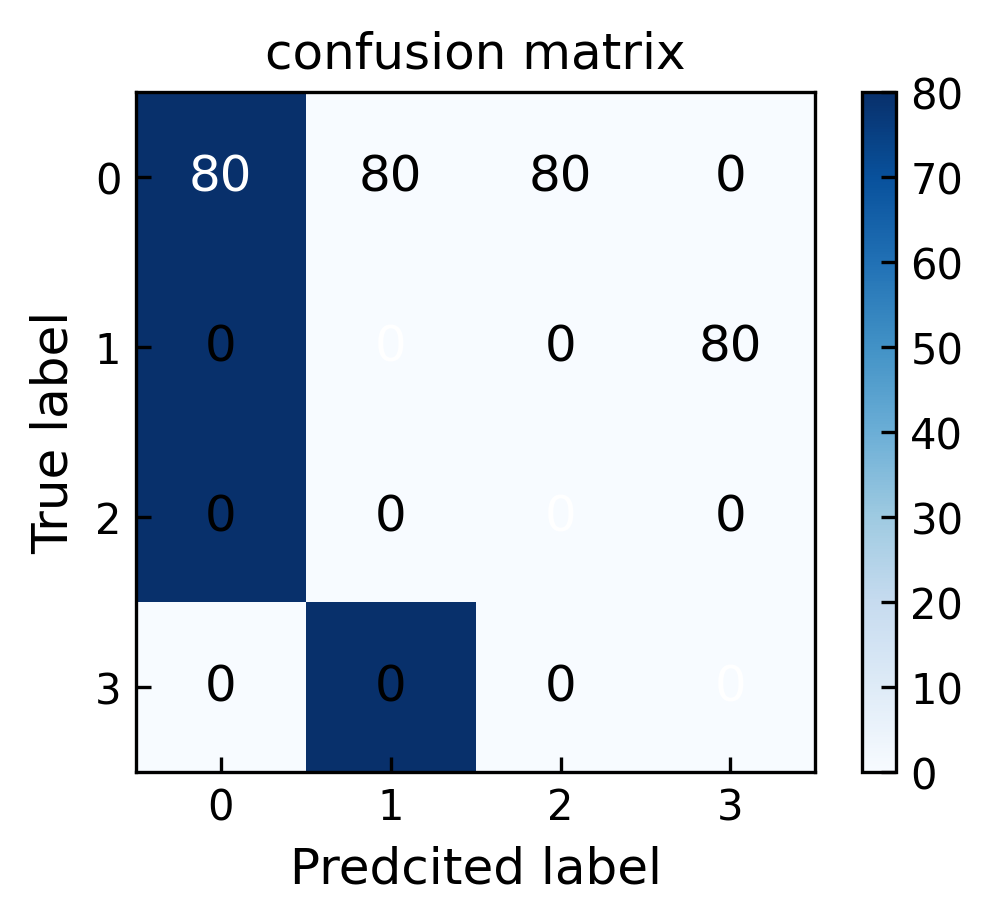

In [29]:
y_true = test_label
class_name = ["0", "1", "2", "3", ]
plot_confusion_matrix(y_true, y_predict, class_name)